# Lab 2, intro to pyhton 

## Generating Your Virtual Data Set

### 1. 
We have already converted our data into a csv file of the correct dimensions and we have named it `dataLab1.csv`

We therefore start by importing needed libraries

In [1]:
#imporing all at once
import numpy as np
import os
import matplotlib.pyplot as plt
import math

### 2. and 3.
Below we input the data using the `no.loadtxt()` function
in our specific case we decided not to use the `transpose()` function as we find it convinient to work with the current dimensioins of the array

In [2]:
#input of data
data = 'dataLab1.csv'
results = np.loadtxt(data, delimiter=',')
#print(results)

In [3]:
#code for question 4
print('#4')
meanRslt = np.mean(results, axis=0)
print('mean')
print(meanRslt)
stdRslt = np.std(results, axis=0)
print('std')
print(stdRslt)

#4
mean
[1.12365 1.6228  2.0338  2.4064  2.7054 ]
std
[0.03738218 0.05150495 0.06280812 0.04810135 0.0075921 ]


### 4.

The results obtained for the mean are identical to those previously obtained

However these calculations for standard deviation are very close but do not perfectly agree with the previously calculated values for the standard deveation
We belive this is due to rounding being done differently between our calculations and the ones provided by python. Seeing as we are not perfect machines we are inclined to trust these values more then the previously obtained results.

This being said, the differences are negligeable at best and these slight discreptancies are not a significant problem

In [4]:
#def for question 5
def data_generator(mean, std, n_measurements = 500, n_samples = 20):
    """
    Generate an array of measurements from a normal distribution.
    Parameters
    ----------
    mean : float
    Desired mean value of the measurements.
    std : float
    Desired standard deviation of the measurements.
    n_measurements : int, optional
    Number of separate measurements. Default is 500 measurements.
    n_samples : int, optional
    Number of samples taken per measurement. Default is 20 samples.
    per measurement.
    Returns
    -------
    data : numpy.ndarray
    Array representing the experimental data. Each measurement
    (composed of many samples) is a row of this array:
    -----------------------------------
    meas1 | sample0 | sample1 | sample2 | ...
    meas2 | sample0 | sample1 | sample2 | ...
    meas3 | sample0 | sample1 | sample2 | ...
    ...
    """
    return np.random.normal(loc = mean, scale = std, size = (n_measurements, n_samples))

In [5]:
#creating a fake data set for our rolling experiment using std and mean obtained
simdata = data_generator(np.mean(results, axis=0)[4], np.std(results, axis=0)[4])

### 5.

above, we have defined the random data set function by coping and pasting the provided code and then we generated a data set containing 500 sets of 20 trials. This simulated data set was created using the sample standard deviation and sample mean of the 57cm run in the previous lab.

## b) Analysis, Measurment Statistics

### 1.

below is a histogram of the simulated data. To achieve this, we had to use `np.ravel()` to transform our two dimensional array into a single column essentialy tricking the histogram into thinking that all the results come from the same trial even though it 500 sets of 20.

The same procces was done twice, varying the number of bins to show what a heigher bin count graphicaly represents.

Finally both the mean and the standard diviation was computed.
Note how similar these values are to the standard diviation and mean of our final set of values (for longest distance rolled). This is because the fake data set was generated with a parent gaussian distribution with a mean and stnadard diviation equal to the ones obtained from our data set. 

The histogram with 10 bins was saved to a csv file named `fakedata.csv`


bins=10


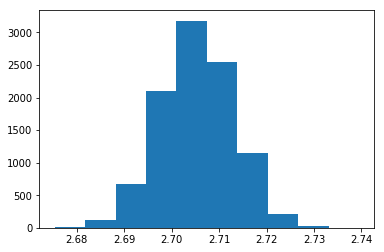

bins=50


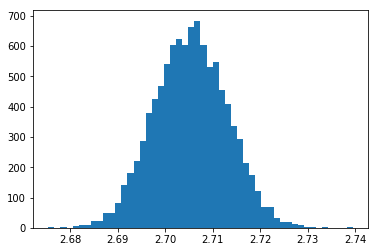

mean
2.7053700724451546
std
0.007659231015359453


In [6]:
#create and save plot
print('bins=10')
plt.hist(np.ravel(simdata), bins=10)
plt.show()
print('bins=50')
histdat, n, _ = plt.hist(np.ravel(simdata), bins=50)
plt.show()
print('mean')
print(np.mean(simdata))
print('std')
print(np.std(simdata))
np.savetxt('fakedata.csv', histdat)

### 3.

Below we have created histograms of the means of the each set of 20 trials (500 means). This gives us a result distribution.

Once again we have created two histograms with varying bin counts 10 and 100 to show the graphical effects. 

To create this histogram we used the `np.mean()` function to compute the means along the x axis of the simulated data array to generate an array containing the 500 means of 20 trials. 
Then the histogram was created using this array

The mean and standard deviation where computed.
Note that the mean was very similar to the mean of all the results while the standard diviation decreased according to the statistical law 
`std' = std/sqrt(Nrepeatedruns)`

Finally the data was saved to a file named `fakedatamean.csv`

bins=10


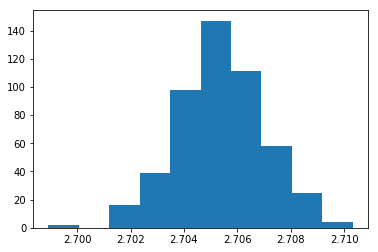

bins=50


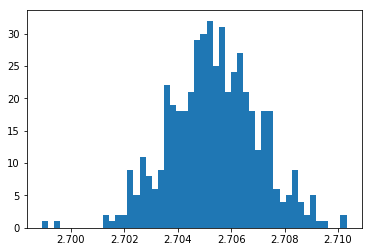

mean
2.7053700724451546
std
0.0016581322157584381


In [7]:
#calculation mean of each data set
fkmean = np.mean(simdata, axis=1)
print('bins=10')
plt.hist(fkmean, bins=10)
plt.show()
print('bins=50')
histdat, n, _ = plt.hist(fkmean, bins=50)
plt.show()
print('mean')
print(np.mean(fkmean))
print('std')
print(np.std(fkmean))
np.savetxt('fakedatamean.csv', histdat)

### 3. 

Below we have the graphs with a normalized Gaussian distribution
* first for the original histogram 
* second for the result histogram

This is acheived by creating a parent distribution using the sample mean and sample standard diviation. Then mapping this function out for 100 points in the range of the data and finaly ploting it over the histogram.

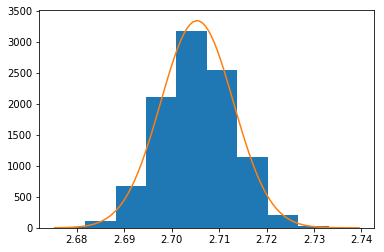

In [8]:
#overlay of gausian function for intial data
#start by defining the function
mn = np.mean(simdata)
st = np.std(simdata)
x= np.linspace(np.min(simdata),np.max(simdata),num=100)
prob = (np.exp(-np.power(x - mn,2)/(2*np.power(st,2))))/(st*np.sqrt(2*math.pi))

#get the bin and create the gaussian

n , bins , _= plt.hist(np.ravel(simdata), bins=10)

bn = bins[1]-bins[0]
sampint = bn*np.sum(n)

probnorm = prob*sampint

plt.plot(x,probnorm)
plt.show()

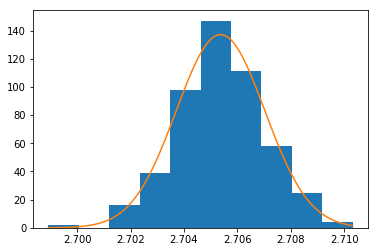

In [9]:
#overlay of gausian function for resaults data
#start by defining the function
mnR = np.mean(fkmean)
stR = np.std(fkmean)
x= np.linspace(np.min(fkmean),np.max(fkmean),num=100)
prob = (np.exp(-np.power(x - mnR,2)/(2*np.power(stR,2))))/(stR*np.sqrt(2*math.pi))

#get the bin and create the gaussian

n , bins , _= plt.hist(fkmean, bins=10)

bn = bins[1]-bins[0]
sampint = bn*np.sum(n)

probnorm = prob*sampint

plt.plot(x,probnorm)
plt.show()

### 4.

If we compare the standard diviation of the simulated data with the standard diviation of the results data we should ovserve
`std' = std/sqrt(Nrepeatedruns)`

Calculating the standard diviation of these two runs we get:


In [10]:
#question 4 
print('Measurments Distribution std')
print(np.std(np.ravel(simdata)))
print('Results Distribution std')
print(np.std(fkmean))
print('lets look at the ratio and compare it to 1/sqrt(N)')
print('ratio')
print(np.std(fkmean)/np.std(np.ravel(simdata)))
print('1/sqrt(20)')
print(1/np.sqrt(20))
print('Very close indeed, this shows that the relashionship holds')

Measurments Distribution std
0.007659231015359453
Results Distribution std
0.0016581322157584381
lets look at the ratio and compare it to 1/sqrt(N)
ratio
0.21648807986510651
1/sqrt(20)
0.22360679774997896
Very close indeed, this shows that the relashionship holds


### 5. 

Now if we were to take the _result distribution_ of the result distribution we will and keep doing this until we essentialy have one data point. and every time the relatshionship of the new standard diviation to the old one will hold, so taking this to the extreme where we only want one data point:
`stderror = samplestd/sqrt(N)`

looking at the standard error we get:

In [11]:
print('standard error is:')
print(np.std(fkmean)/np.sqrt(500))

standard error is:
7.415392700236431e-05


## Statistics of your measurment distribution:

### 1.

Creating a histogram with 6 bins each the width of one standard diviation.
This is done by setting `bins=6` and then setting the min to max range of the graph such that when divided equally into 6, each bin will be exactly one standard diviation

Finally this histogram is saved to `6bin.csv`

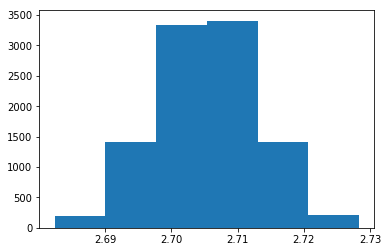

In [12]:
#last part

std = np.std(np.ravel(simdata))
mean = np.mean(np.ravel(simdata))
xrange = (mean - 3*std, mean + 3*std)
histdat1, n, _ = plt.hist(np.ravel(simdata), bins=6, range=xrange)
plt.show()
np.savetxt('6bin.csv',histdat1)

### 2. 

Below we have computed the fraction of results that lie within one, two and three standard diviations from the mean.

For a perfect Gaussian distribution we would expect these fractions to be respectivly 0.68, 0.95, 0.997 which is very close to the obtained results

In [13]:
#last question
print('within 1 standard deviation')
tottrials = 20*500
frac1 = (histdat1[2]+histdat1[3])/(tottrials)
print(frac1)

print('within 2 standard deviation')
frac2 = (np.sum(histdat1)-histdat1[0]-histdat1[5])/(tottrials)
print(frac2)

print('within 3 standard deviation')
frac3 = (np.sum(histdat1))/(tottrials)
print(frac3)


within 1 standard deviation
0.6743
within 2 standard deviation
0.9575
within 3 standard deviation
0.9977
